# demo03_boston.ipynb    波士顿地区房屋价格

In [1]:
import numpy as np
import pandas as pd 
import sklearn.linear_model as lm
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.metrics as sm
import sklearn.utils as su
import sklearn.datasets as sd

In [2]:
# 加载波士顿房屋数据集
boston = sd.load_boston()
x = boston.data    # (506,13) 输入数据
y = boston.target  # （506,） 输出数据

# 整理数据, 完成简单数值统计分析
data = pd.DataFrame(x, columns=boston.feature_names)
data['target'] = y
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


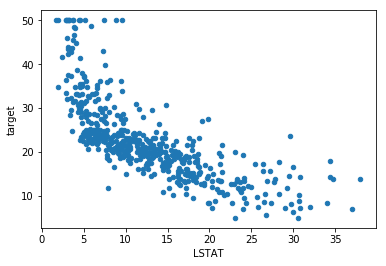

In [37]:
data.plot.scatter(x='LSTAT', y='target')

In [4]:
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [5]:
# 基于这组数据训练预测模型，预测房价
# 1. 打乱数据集， 拆分测试集与训练集
x, y = data.loc[:, :'LSTAT'], data['target']
x, y = su.shuffle(x, y, random_state=7)  # 打乱数据集
train_size = int(len(x) * 0.8)
train_x, test_x, train_y, test_y = \
    x.iloc[:train_size], x.iloc[train_size:], \
    y[:train_size], y[train_size:]
    
# 2. 针对训练集  训练岭回归模型，  针对测试集  验证模型
C = np.arange(0, 1000, 10)
for c in C:
    model = lm.Ridge(c)
    model.fit(train_x, train_y)
    pred_test_y = model.predict(test_x)
#     print(sm.r2_score(test_y, pred_test_y))
#     print(sm.mean_absolute_error(test_y, pred_test_y))
model = lm.Ridge(alpha=0)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.8145609791852872


In [6]:
# 训练多项式回归模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(1), lm.LinearRegression())
model = pl.make_pipeline(
    sp.PolynomialFeatures(2), lm.Ridge(alpha=100))
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
print(sm.mean_absolute_error(test_y, pred_test_y))

0.9068527607857035
2.1699981358470977


1 : 0.491305218265216
2 : 0.7678640981782062
3 : 0.7419455665237111
4 : 0.8202560889408635
5 : 0.8450752976507327
6 : 0.7466349579994627
7 : 0.8262480170423548
8 : 0.8080076381142317
9 : 0.8019235921590663
0.8450752976507327


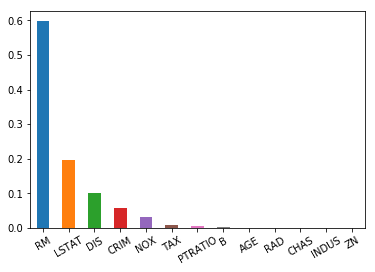

In [42]:
# 训练决策树模型，并测试效果
import sklearn.tree as st
for md in range(1, 10):
    model = st.DecisionTreeRegressor(max_depth=md)
    model.fit(train_x, train_y)
    pred_test_y = model.predict(test_x)
    print(md, ':', sm.r2_score(test_y, pred_test_y))
# 选择5作为最优超参数
model = st.DecisionTreeRegressor(max_depth=5)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出单颗决策树模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values(ascending=False).plot.bar(rot=30)

## 集成算法 

0.9147386136485731


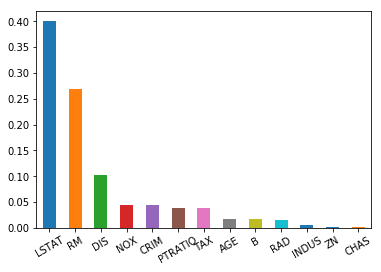

In [30]:
# AdaBoost模型
import sklearn.ensemble as se
model = st.DecisionTreeRegressor(max_depth=5)
model = se.AdaBoostRegressor(model, n_estimators=400, random_state=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出AdaBoost模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values(ascending=False).plot.bar(rot=30)

## GBDT

0.9273234449951675


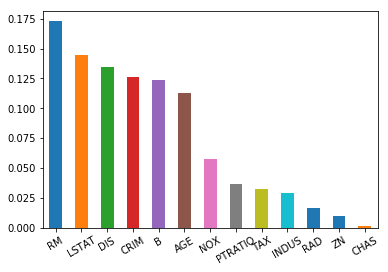

In [88]:
model = se.GradientBoostingRegressor(
    max_depth=3, n_estimators=600, min_samples_split=3)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出GBDT模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values(ascending=False).plot.bar(rot=30)

## 随机森林

0.922775148010557


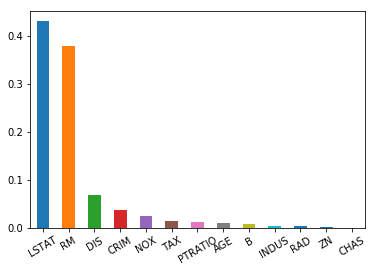

In [103]:
model = se.RandomForestRegressor(
    max_depth=7, n_estimators=300, min_samples_split=3)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出GBDT模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values(ascending=False).plot.bar(rot=30)